# Cartpole



The state and control vectors $\textbf{x}$ and $\textbf{u}$ are defined as follows:

$$
\begin{equation*}
\textbf{x} = \begin{bmatrix}
    x & \dot{x} & \theta & \dot{\theta}
    \end{bmatrix}
\end{equation*}
$$

$$
\begin{equation*}
\textbf{u} = \begin{bmatrix}
    F_{x}
    \end{bmatrix}
\end{equation*}
$$

The goal is to swing the carptole upright:
$$
\begin{equation*}
\textbf{x}_{goal} = \begin{bmatrix}
    0 & 0 & \pi & 0
    \end{bmatrix}
\end{equation*}
$$

In [1]:
%matplotlib inline

In [2]:
from __future__ import print_function

In [3]:
import matplotlib.pyplot as plt

In [4]:
import pddp
import pddp.examples

In [5]:
import torch
import numpy as np

In [6]:
DT = 0.1  # Time step (s).
RENDER = True  # Whether to render the environment or not.
N = 25 # Horizon length.

# Disable uncertainty since we are dealing with known dynamics.
ENCODING = pddp.StateEncoding.IGNORE_UNCERTAINTY

In [7]:
cost = pddp.examples.cartpole.CartpoleCost()
model = pddp.examples.cartpole.CartpoleDynamicsModel(DT)
env = pddp.examples.cartpole.CartpoleEnv(dt=DT, render=RENDER)

In [8]:
def plot(Z, U):
    t = np.arange(N + 1) * DT
    X = pddp.utils.encoding.decode_mean(Z, ENCODING).detach().numpy()
    U = U.detach().numpy()

    x = X[:, 0]
    x_dot = X[:, 1]
    theta = np.unwrap(X[:, 2])  # Makes for smoother plots.
    theta_dot = X[:, 3]
    
    plt.figure()
    plt.plot(theta, theta_dot)
    plt.xlabel("Orientation (rad)")
    plt.ylabel("Angular velocity (rad/s)")
    plt.title("Orientation Phase Plot")

    plt.figure()
    plt.plot(t, x)
    plt.xlabel("Time (s)")
    plt.ylabel("Position (m)")
    plt.title("Position path")
    
    plt.figure()
    plt.plot(t, x_dot)
    plt.xlabel("Time (s)")
    plt.ylabel("Velocity (m / s)")
    plt.title("Velocity path")
    
    plt.figure()
    plt.plot(t, theta)
    plt.xlabel("Time (s)")
    plt.ylabel("Orientation (rad)")
    plt.title("Orientation path")

    plt.figure()
    plt.plot(t, theta_dot)
    plt.xlabel("Time (s)")
    plt.ylabel("Angular velocity (rad / s)")
    plt.title("Angular velocity path")
    
    plt.figure()
    plt.plot(t[:-1], U)
    plt.xlabel("Time (s)")
    plt.ylabel("Force (N)")
    plt.title("Action path")
    
    plt.figure()
    plt.plot(J_hist)
    plt.xlabel("Iteration")
    plt.ylabel("Total loss")
    plt.title("Loss path")

In [9]:
def on_iteration(iteration, Z, U, J_opt, accepted, converged):
    J_opt = J_opt.detach().numpy()

    J_hist.append(J_opt)
    info = "CONVERGED" if converged else ("accepted" if accepted else "FAILED")
    final_state = Z[-1].detach().numpy()
    final_state[2] = (final_state[2] + np.pi) % (2 * np.pi) - np.pi
    print("iteration", iteration + 1, info, J_opt, final_state)

In [10]:
controller = pddp.controllers.PDDPController(env, model, cost)

In [11]:
U = 1e-1 * torch.randn(N, model.action_size)

In [12]:
J_hist = []
controller.eval()
Z, U = controller.fit(U, encoding=ENCODING, n_iterations=200, tol=0,
                      on_iteration=on_iteration)

iteration 8 FAILED 613.6237 [-6.84707    -5.8550196   0.39269763 15.977842  ]
iteration 9 accepted 255.02896 [-5.8918386 -2.6898515 -2.758167   3.1650376]
iteration 10 accepted 237.75455 [-5.8583584  -3.020999    3.0471094  -0.00738513]
iteration 11 accepted 210.41893 [-5.4916315 -2.787078   3.09362    0.2944517]
iteration 12 accepted 125.55867 [-4.248489  -2.239107   2.962752  -0.5044161]
iteration 13 accepted 46.021847 [-2.3259227  -1.0385951   2.996329   -0.31625962]
iteration 14 accepted 14.1569195 [-0.48191446 -0.25966233  3.0159357  -0.40391225]
iteration 18 accepted 12.3537855 [ 0.17051461 -0.09703738  3.024512   -0.425301  ]
iteration 19 accepted 11.423892 [2.5464505e-01 4.1344702e-02 3.1346500e+00 2.0011067e-03]
iteration 20 accepted 10.569088 [-0.01513062  0.08758561 -3.0931613  -0.01874152]
iteration 21 accepted 10.427756 [-0.01573089  0.08289883 -3.0953243  -0.01782888]
iteration 22 accepted 10.424122 [-0.01565719  0.08274117 -3.0954273  -0.01779586]
iteration 23 FAILED 10.

iteration 115 accepted 7.9417086 [ 5.4982778e-02 -2.3929179e-03  3.1245821e+00  7.6162815e-04]
iteration 116 FAILED 7.9417086 [ 5.4982778e-02 -2.3929179e-03  3.1245821e+00  7.6162815e-04]
iteration 117 FAILED 7.9417086 [ 5.4982778e-02 -2.3929179e-03  3.1245821e+00  7.6162815e-04]
iteration 118 FAILED 7.9417086 [ 5.4982778e-02 -2.3929179e-03  3.1245821e+00  7.6162815e-04]
iteration 119 FAILED 7.9417086 [ 5.4982778e-02 -2.3929179e-03  3.1245821e+00  7.6162815e-04]
iteration 120 FAILED 7.9417086 [ 5.4982778e-02 -2.3929179e-03  3.1245821e+00  7.6162815e-04]
iteration 121 FAILED 7.9417086 [ 5.4982778e-02 -2.3929179e-03  3.1245821e+00  7.6162815e-04]
iteration 122 FAILED 7.9417086 [ 5.4982778e-02 -2.3929179e-03  3.1245821e+00  7.6162815e-04]
iteration 123 FAILED 7.9417086 [ 5.4982778e-02 -2.3929179e-03  3.1245821e+00  7.6162815e-04]
iteration 124 FAILED 7.9417086 [ 5.4982778e-02 -2.3929179e-03  3.1245821e+00  7.6162815e-04]



/Users/anass/Dev/personal/pddp/pddp/controllers/ilqr.py:235: UserWarning: exceeded max regularization term
  warnings.warn("exceeded max regularization term")


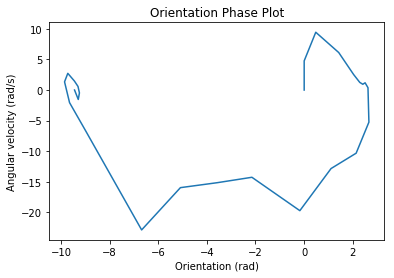

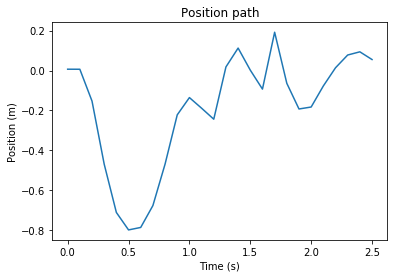

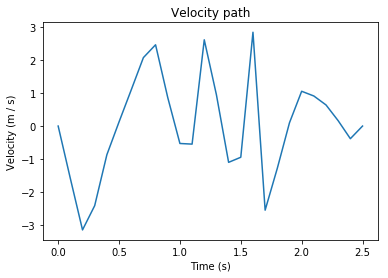

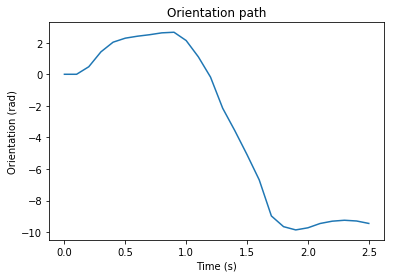

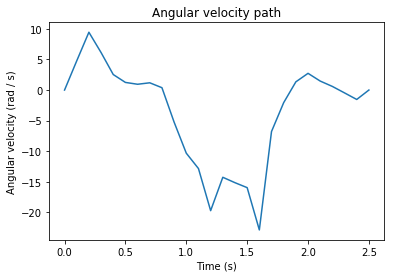

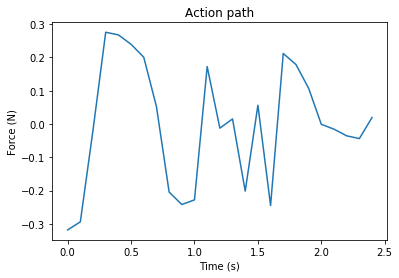

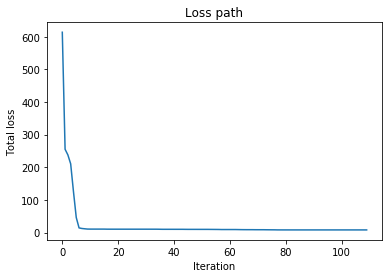

In [13]:
plot(Z, U)

In [14]:
if RENDER:
    # Wait for user interaction before visualizing. 
    _ = input("Press ENTER to continue")

Press ENTER to continue


In [15]:
for u in U:
    env.apply(u)

In [16]:
env.close()